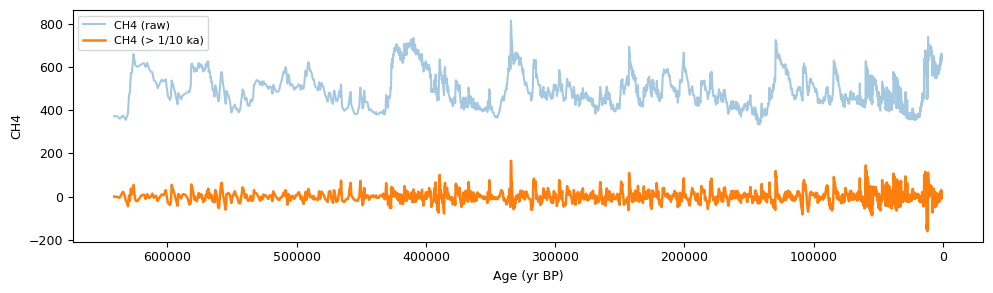

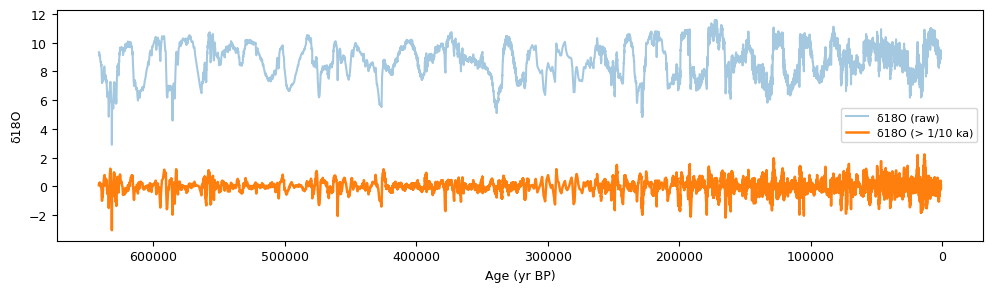

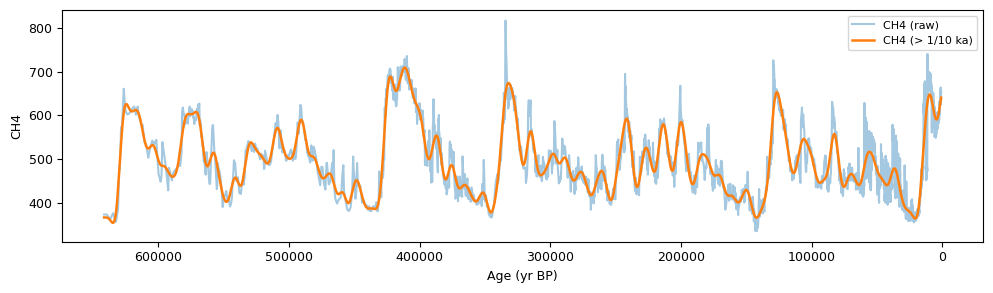

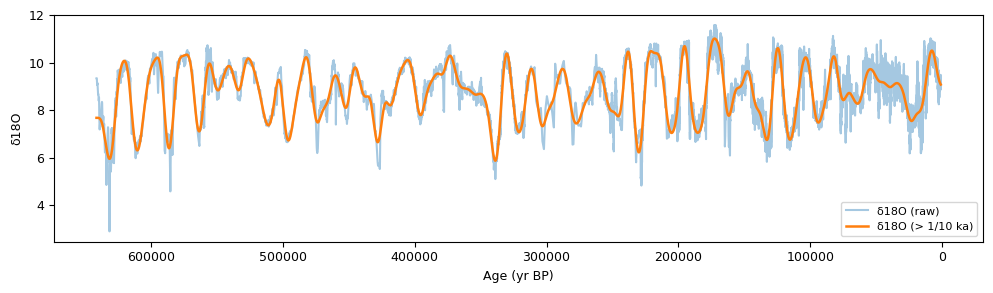

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# 0) Load raw data
df_ch4 = pd.read_excel('other_data/CH4_AICC2023.xlsx', sheet_name='Sheet1')
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)


# save the df_ch4 and df_d18O to csv under Raw_data/
df_ch4.to_csv('D:/VScode/bipolar_seesaw_CCM/Raw_data/CH4_AICC2023.csv', index=False)
df_d18O.to_csv('D:/VScode/bipolar_seesaw_CCM/Raw_data/Speleothem_d18O.csv', index=False)



dt=10
# 1) Build common 10-yr age grid over their overlap
age_min = 1000 # max(df_ch4['age'].min(), df_d18O['age'].min())
age_max = min(df_ch4['age'].max(), df_d18O['age'].max())
ages = np.arange(age_min, age_max + 1, dt)

# 2) Interpolate each onto that grid
ch4 = np.interp(ages, df_ch4['age'], df_ch4['ch4'])
d18O = np.interp(ages, df_d18O['age'], df_d18O['-d18O'])



df_ch4_interp = pd.DataFrame({'age':ages, 'ch4':ch4})
df_d18O_interp = pd.DataFrame({'age':ages, 'd18O':d18O})

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)

# SAVE THE FILTERED DATA csv under filtered_data/
df_filt_ch4.to_csv('D:/VScode/bipolar_seesaw_CCM/filtered_data/CH4_AICC2023_filtered.csv', index=False)
df_filt_d18O.to_csv('D:/VScode/bipolar_seesaw_CCM/filtered_data/Speleothem_d18O_filtered.csv', index=False)

df_filt_ch4_low, df_filt_d18O_low = sa.lowpass_ch4_d18O(
    df_ch4_interp.copy(),          # DataFrame with columns ['age','ch4']
    df_d18O_interp.copy(),         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)

# save the low-pass filtered data to csv under filtered_data/
df_filt_ch4_low.to_csv('D:/VScode/bipolar_seesaw_CCM/filtered_data/CH4_AICC2023_filtered_low.csv', index=False)
df_filt_d18O_low.to_csv('D:/VScode/bipolar_seesaw_CCM/filtered_data/Speleothem_d18O_filtered_low.csv', index=False)

# read the lowpass filtered data from csv
# df_filt_ch4_low = pd.read_csv('D:/VScode/bipolar_seesaw_CCM/filtered_data/CH4_AICC2023_filtered_low.csv')
# df_filt_d18O_low = pd.read_csv('D:/VScode/bipolar_seesaw_CCM/filtered_data/Speleothem_d18O_filtered_low.csv')

# df_filt_ch4, df_filt_d18O = sa.bandpass_ch4_d18o(
#     df_ch4_interp,
#     df_d18O_interp,
#     low_period = 100,     # keep variability slower than 300 yr
#     high_period = 10_000,  # and faster than 3 ka
#     flip_sign = False,
#     plot = True
# )

# crop the df_filt_ch4 for age<430,000
# df_filt_ch4 = df_filt_ch4[df_filt_ch4['age'] < 430_000]
# crop the df_filt_ch4 for age<300,000 and age>100,000
# df_filt_ch4 = df_filt_ch4[(df_filt_ch4['age'] < 300_000) & (df_filt_ch4['age'] > 100_000)]


# Diff age analysis

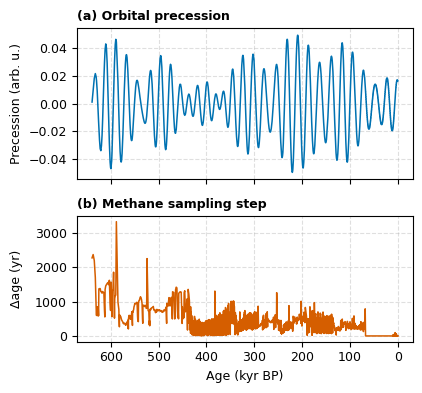

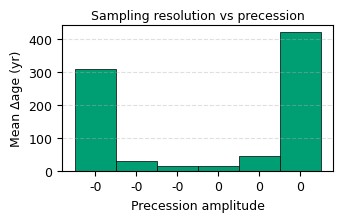

In [13]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig_pair, fig_bar = sa.age_gap_ana(
    df_ch4,
    age_min=0,
    age_max=640_000,
    pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
    n_bins=6,
    tolerance=200
)



In [10]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


fig = sa.age_gap_interactive(
    df_ch4,
    age_min=0,
    age_max=640_000,
    H_line=100,
)
fig.show()

Maximum Δage within 0-640000 yr BP: 3317 years
95% quantile of Δage: 19 years
Median Δage: 2 years


In [11]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig = sa.age_gap_hist(df_ch4.copy(), age_min=120000, age_max=640_000, nbins=30)
fig.show()


Maximum Δage within 120000-640000 yr BP: 3317 years
95% quantile of Δage: 982 years
Median Δage: 347 years


# TE dT plot

     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000392  0.000  0.000126  0.412     True
1    20  0.000628  0.005  0.000254  0.424     True
2    30  0.000976  0.000  0.000313  0.586     True
3    40  0.001053  0.009  0.000459  0.508     True
4    50  0.001191  0.041  0.000720  0.314     True
5    60  0.001193  0.113  0.000786  0.404    False
6    70  0.001863  0.015  0.000849  0.356     True
7    80  0.002079  0.016  0.001145  0.249     True
8    90  0.001359  0.273  0.001253  0.249    False
9   100  0.002563  0.015  0.001445  0.239     True
10  110  0.002526  0.039  0.001379  0.332     True
11  120  0.002394  0.087  0.001847  0.163    False
12  200  0.003074  0.305  0.002660  0.308    False


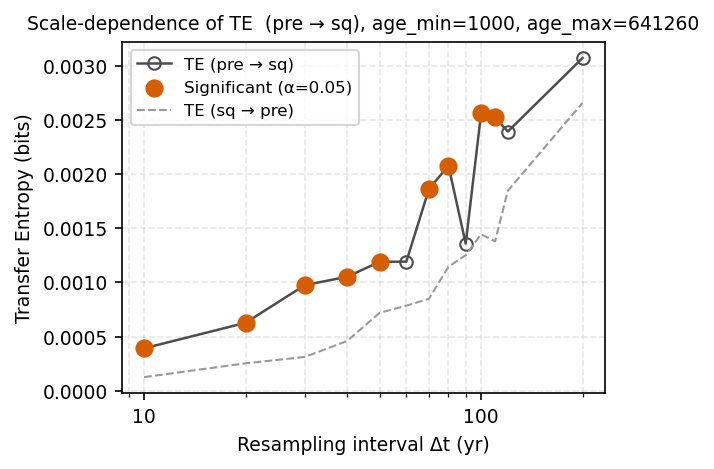

In [6]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_ch4,                 # your raw sq-series
    dt_steps,
    forcing_bins=5, sq_bins=2,
    n_surr=1000, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000390  0.000  0.000061  0.940     True
1    20  0.000655  0.010  0.000123  0.950     True
2    30  0.000629  0.065  0.000222  0.860    False
3    40  0.000871  0.075  0.000260  0.920    False
4    50  0.000944  0.165  0.000372  0.880    False
5    60  0.000933  0.345  0.000531  0.795    False
6    70  0.001094  0.260  0.000564  0.810    False
7    80  0.001556  0.070  0.000505  0.880    False
8    90  0.001583  0.220  0.000521  0.890    False
9   100  0.001712  0.225  0.000744  0.725    False
10  110  0.001642  0.295  0.000789  0.755    False
11  120  0.001543  0.515  0.001118  0.565    False
12  130  0.002328  0.160  0.000896  0.825    False
13  140  0.002973  0.075  0.001052  0.725    False
14  150  0.001968  0.500  0.001295  0.660    False
15  200  0.003366  0.195  0.001823  0.575    False


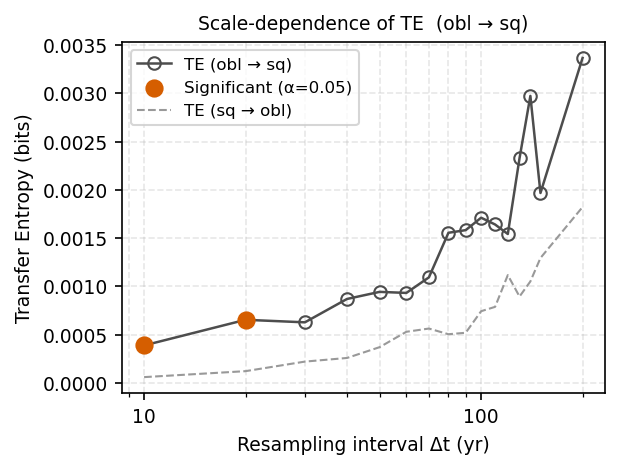

In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_ch4,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=5, sq_bins=2,
    n_surr=200, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


# TE from pre and obl to CH4 MCV (dt=10)

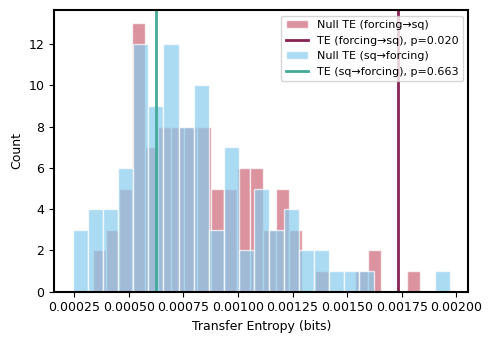

True


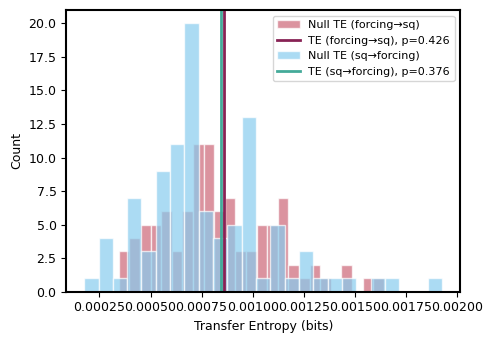

False


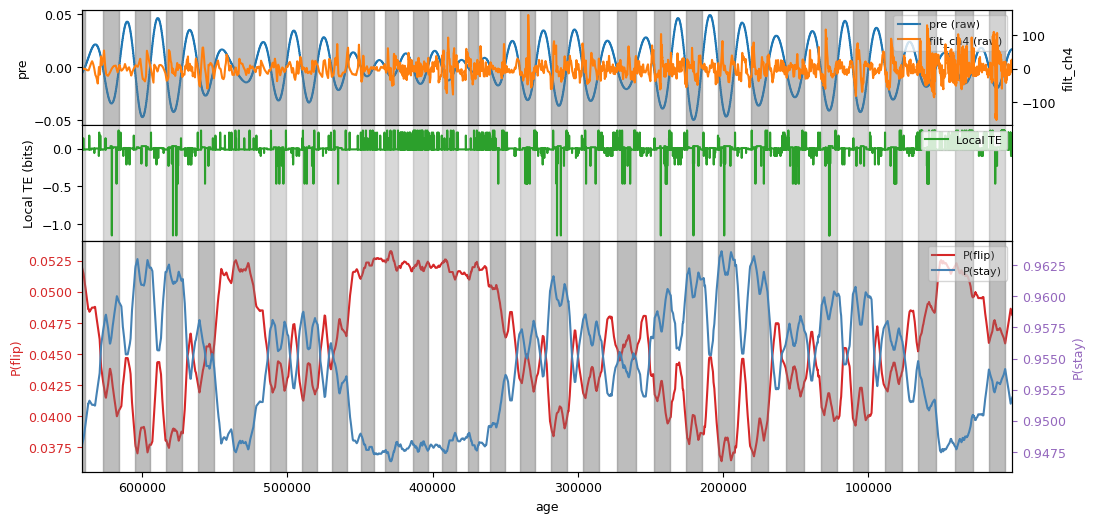

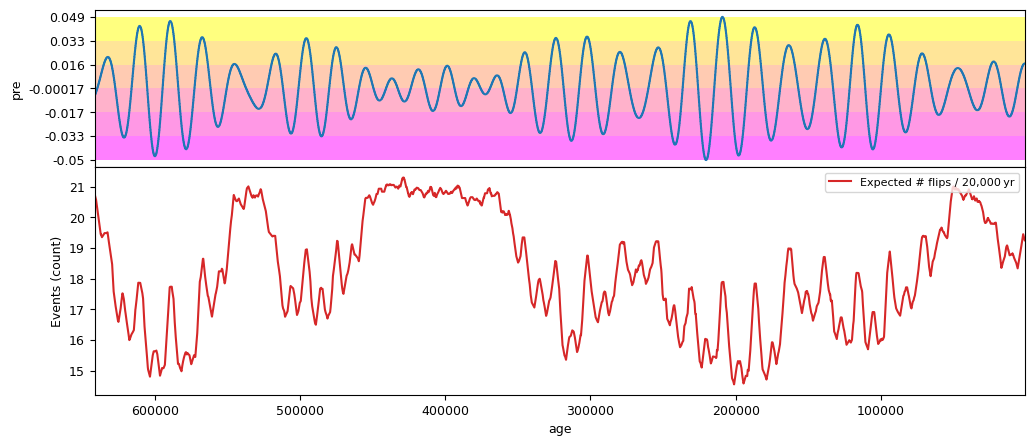

[20.74417183 20.73508807 20.72600431 ... 19.27191432 19.26283056
 19.2537468 ]


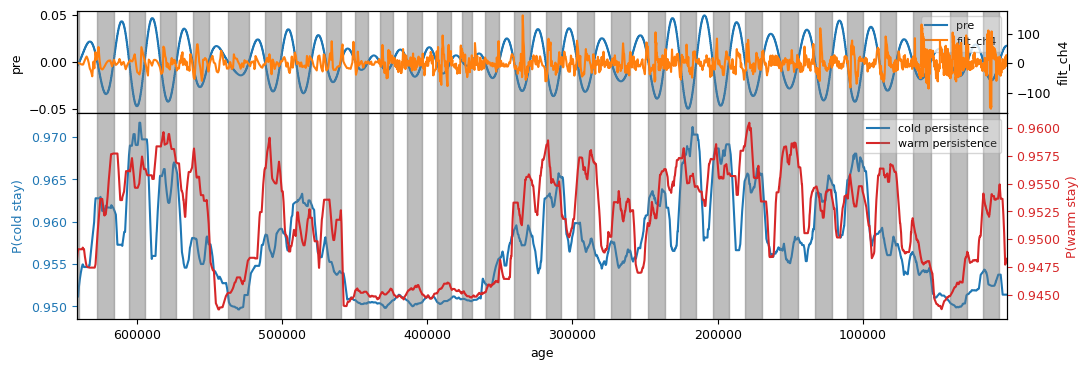

In [8]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 500, if_plot=False)
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_sq_i.copy(), 50, if_plot=False)

# crop the df_filt_ch4 between 120000 and 640000
# df_filt_ch4 = df_filt_ch4[(df_filt_ch4['age'] >= 120000) & (df_filt_ch4['age'] <= 640000)].reset_index(drop=True)

dt = 50
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), dt, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig, te_obl=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

flip_events =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6)

print(flip_events)

# LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)



# Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)




# Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# Predict future No. events

In [9]:
# Read the precession data for 0-100 kyr
pre_future_path = r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_future_0_100kyr_inter100.txt"
df_pre_future_100k = pd.read_csv(pre_future_path, sep=r'\s+', header=None, engine='python')

# Name the columns
df_pre_future_100k.columns = ['age', 'pre']

# Convert age to years (assuming it's in kyr)
df_pre_future_100k['age'] = df_pre_future_100k['age'].abs() * 1000

# Ensure age is in ascending order
df_pre_future_100k = df_pre_future_100k.sort_values('age').reset_index(drop=True)


age_min = df_pre_future_100k['age'].min()
age_max = df_pre_future_100k['age'].max()
new_ages = np.arange(age_min, age_max + dt, dt)

# Interpolate precession values onto the new age grid
pre_interp = np.interp(new_ages, df_pre_future_100k['age'], df_pre_future_100k['pre'])

# Create the resampled dataframe
df_pre_future_resampled = pd.DataFrame({'age': new_ages, 'pre': pre_interp})

print(f"Original data shape: {df_pre_future_100k.shape}")
print(f"Resampled data shape: {df_pre_future_resampled.shape}")
print(f"Age range: {age_min} to {age_max} years")

# crop the data and only keep the data between 0 and 20,000 years
df_pre_future_resampled = df_pre_future_resampled[(df_pre_future_resampled['age'] >= 0) & (df_pre_future_resampled['age'] <= 20_000)].reset_index(drop=True)

Original data shape: (1001, 2)
Resampled data shape: (2001, 2)
Age range: 0.0 to 100000.0 years


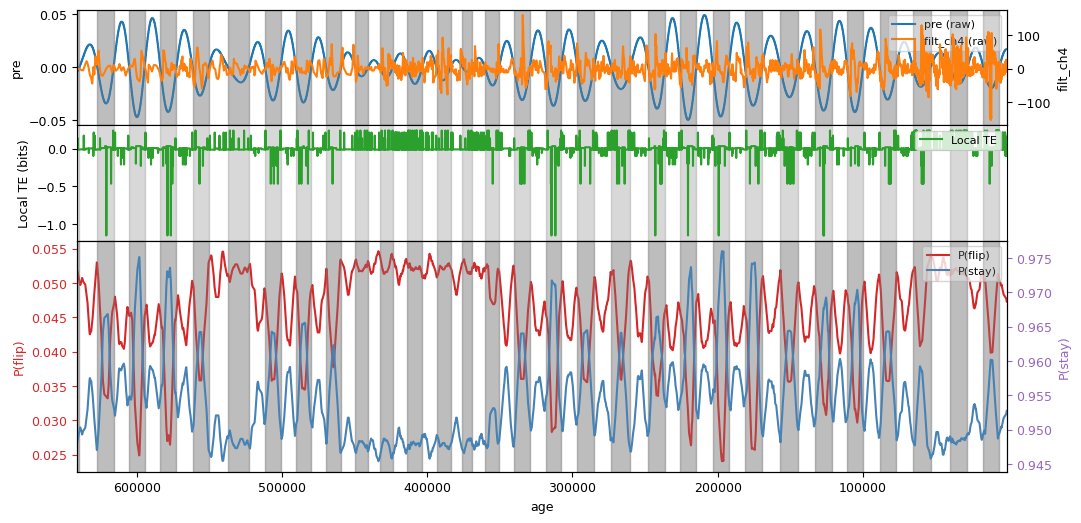

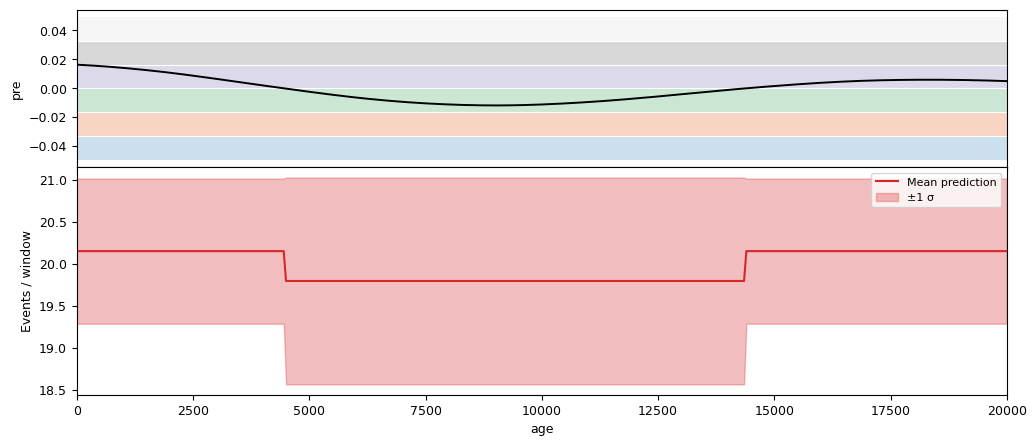

In [25]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=100)

# dt=50
# ages_future = np.arange(0 , 20_000 + dt, dt)
# pre_future  = 0.05 * np.sin(2 * np.pi * ages_future / 20_000)

# df_pre_future = pd.DataFrame({'age': ages_future, 'pre': pre_future})

# 4) predict
events_mu, events_lo, events_hi = sa.predict_events_future(
        df_pre_i.copy(), flip_prob, df_pre_future_resampled,
        window=20_000, nbins_pre=6)


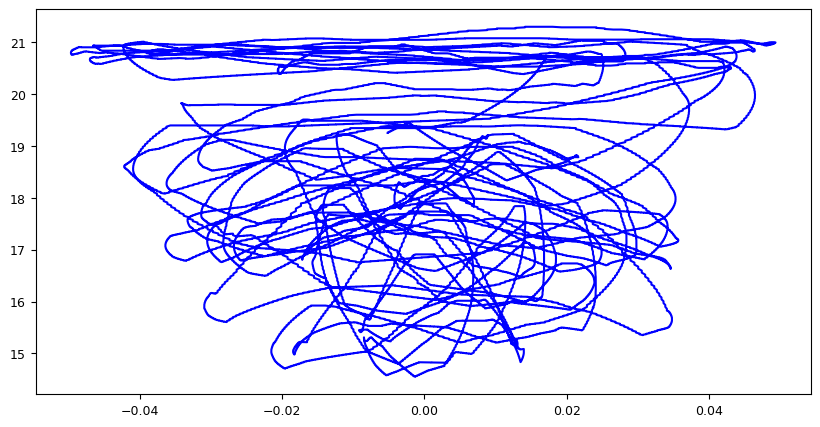

In [58]:
# plot a line plot for df_pre_i['pre] and flip_prob
plt.figure(figsize=(10, 5))
plt.plot(df_pre_i['pre'][1:], flip_events, label='Precession', color='blue')

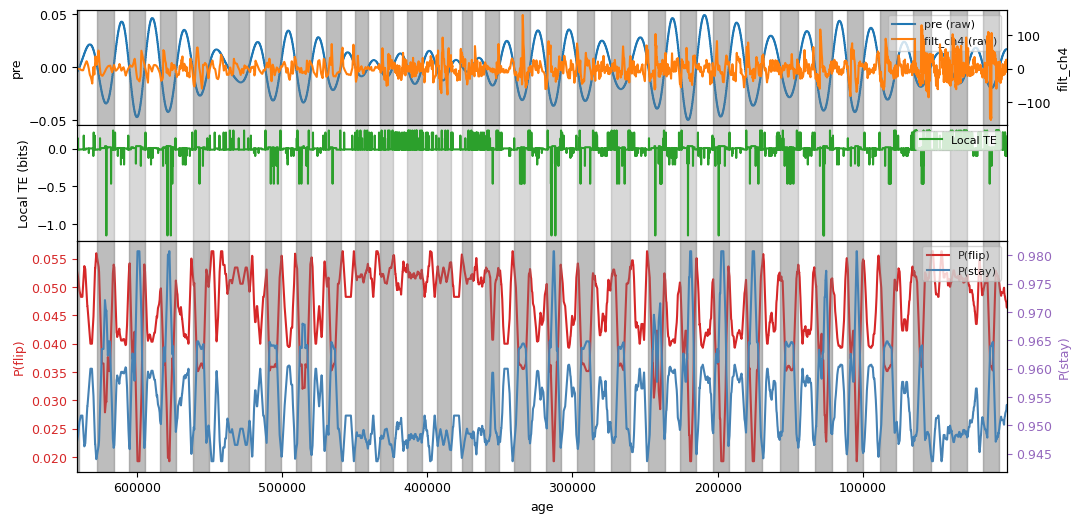

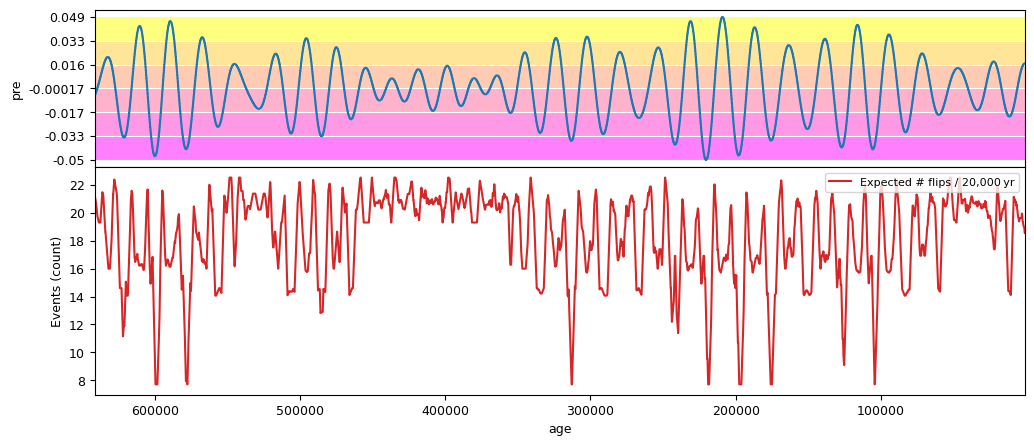

C:\Users\User\AppData\Local\Temp\ipykernel_10744\2674997250.py:103: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, nbins_pre)


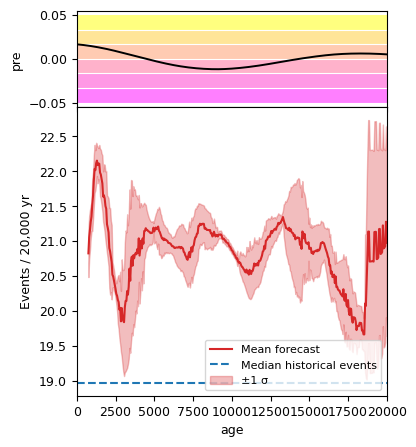

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree            
from matplotlib import colormaps
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

# ───────────────────────── helper: delay-coordinate embedding ──────────────
def _embed(series, E=3, tau=1):
    """Return (matrix, valid_indices)."""
    series = np.asarray(series)
    N = len(series)
    idx = np.arange((E-1)*tau, N)               # times with full history
    mat = np.column_stack([series[idx - j*tau] for j in range(E)])
    return mat, idx


# ───────────────────────────── main CCM-style predictor ────────────────────
def predict_events_future_ccm(df_pre_train,       # historical pre
                              events_train,       # historical events / window
                              df_pre_future,      # future pre
                              window=20_000,      # yr, just meta for label
                              E=3, tau=1, k=None,
                              band_sigma=1.0,     # width of uncertainty band
                              forcing_column='pre',
                              time_column='age',
                              cmap_name='tab20c'):
    """
    Forecast future event counts using a simplex/CCM-style nearest-neighbour
    mapping in precession state-space.

    Returns: (mean, lower, upper) as NumPy arrays aligned to df_pre_future.
    """
    # -------- 0) housekeeping ------------------------------------------------
    if k is None:
        k = E + 1                                # standard simplex choice

    # -------- 1) embed training forcing -------------------------------------
    pre_train = df_pre_train[forcing_column].values[::-1]
    X_train, idx_train = _embed(pre_train, E, tau)

    # align events to embedding indices
    events_train = np.asarray(events_train)
    events_train_emb = events_train[idx_train]   # same length as X_train

    # build KD-tree for fast neighbour search
    tree = cKDTree(X_train)

    # -------- 2) embed future forcing ---------------------------------------
    # pre_future = df_pre_future[forcing_column].values[::-1]
    # t_future   = df_pre_future[time_column].values[::-1]

    pre_future = df_pre_future[forcing_column].values
    t_future   = df_pre_future[time_column].values

    X_future, idx_future = _embed(pre_future, E, tau)

    # -------- 3) nearest-neighbour predictions ------------------------------
    dists, neigh_idx = tree.query(X_future, k=k)        # shape (M,k)
    # distance of closest neighbour, avoid zero
    d1 = dists[:, 0:1] + 1e-12

    # weights: exp( −d / d1 )
    w = np.exp(-dists / d1)

    # weighted mean
    neigh_events = events_train_emb[neigh_idx]          # shape (M,k)
    events_mean = (w * neigh_events).sum(axis=1) / w.sum(axis=1)

    # weighted variance
    var = (w * (neigh_events - events_mean[:, None])**2).sum(axis=1) / w.sum(axis=1)
    sigma = np.sqrt(var)

    events_lower = np.clip(events_mean - band_sigma * sigma, 0, None)
    events_upper = events_mean + band_sigma * sigma

    # pad the first (E-1)*tau points with NaN so arrays align to df_pre_future
    pad = np.full((pre_future.size,), np.nan)
    pad[idx_future] = events_mean
    events_mean = pad

    pad = np.full_like(events_mean, np.nan)
    pad[idx_future] = events_lower
    events_lower = pad

    pad = np.full_like(events_mean, np.nan)
    pad[idx_future] = events_upper
    events_upper = pad

    # -------- 4) PLOT --------------------------------------------------------
    from matplotlib import cm
    nbins_pre = 6
    bins_pre  = np.histogram_bin_edges(pre_train, bins=nbins_pre)

    fig = plt.figure(figsize=(4, 5))
    gs  = fig.add_gridspec(2, 1, height_ratios=[1, 3], hspace=0)

    # (a) future pre with coloured bands
    ax0 = fig.add_subplot(gs[0])
    # cmap = colormaps[cmap_name] # cm.get_cmap(cmap_name, nbins_pre)
    cmap = cm.get_cmap(cmap_name, nbins_pre)
    for i in range(nbins_pre):
        ax0.axhspan(bins_pre[i], bins_pre[i+1],
                    facecolor=cmap(i), alpha=0.5)
        ax0.axhline(bins_pre[i], color='white', lw=0.8)
    ax0.plot(t_future, pre_future, color='black', lw=1.4)
    ax0.set_ylabel(forcing_column)
    ax0.set_xlim(t_future[0], t_future[-1])
    ax0.tick_params(axis='x', labelbottom=False)

    # (b) forecasted events
    ax1 = fig.add_subplot(gs[1], sharex=ax0)
    ax1.plot(t_future, events_mean, color='C3', label='Mean forecast')
    # plot a horizontal line at median of events_train as the baseline
    ax1.axhline(np.median(events_train), color='C0', linestyle='--',
                label='Median historical events')
    ax1.fill_between(t_future, events_lower, events_upper,
                     color='C3', alpha=0.3,
                     label=f'±{band_sigma:.0f} σ')
    ax1.set_xlabel(time_column)
    ax1.set_ylabel(f'Events / {window:,} yr')
    ax1.legend(loc='lower right')

    plt.show()
    return events_mean, events_lower, events_upper



flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=40)

events_train =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6,
        cmap_name='spring')



events_mean, events_lower, events_upper = predict_events_future_ccm(df_pre_i.copy()[1:], events_train,
                            df_pre_future_resampled,
                            E=6, tau=3, band_sigma=1,  
                            cmap_name='spring'
                            )



In [87]:
df_event

age      event
0      641250.0  20.744172
1      641200.0  20.735088
2      641150.0  20.726004
3      641100.0  20.716921
4      641050.0  20.707837
...         ...        ...
12800    1250.0  19.290082
12801    1200.0  19.280998
12802    1150.0  19.271914
12803    1100.0  19.262831
12804    1050.0  19.253747

[12805 rows x 2 columns]

In [91]:
df_event

age      event
0          0  20.744172
1          1  20.735088
2          2  20.726004
3          3  20.716921
4          4  20.707837
...      ...        ...
12800  12800  19.290082
12801  12801  19.280998
12802  12802  19.271914
12803  12803  19.262831
12804  12804  19.253747

[12805 rows x 2 columns]

In [93]:
df_pre_ccm

age       pre
0          0 -0.005173
1          1 -0.005173
2          2 -0.004917
3          3 -0.004917
4          4 -0.004658
...      ...       ...
12800  12800  0.017085
12801  12801  0.017085
12802  12802  0.017109
12803  12803  0.017109
12804  12804  0.017116

[12805 rows x 2 columns]

Length of df_event: 12805


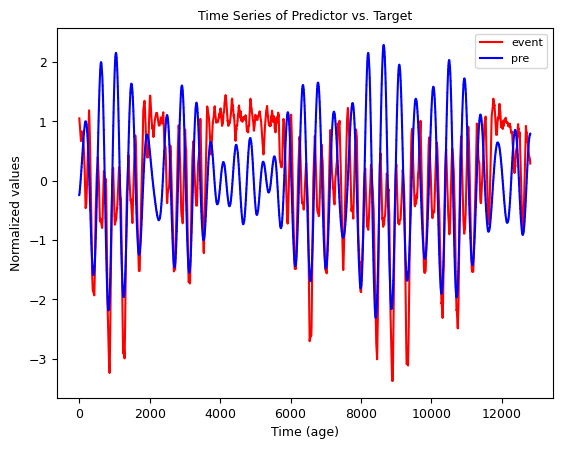

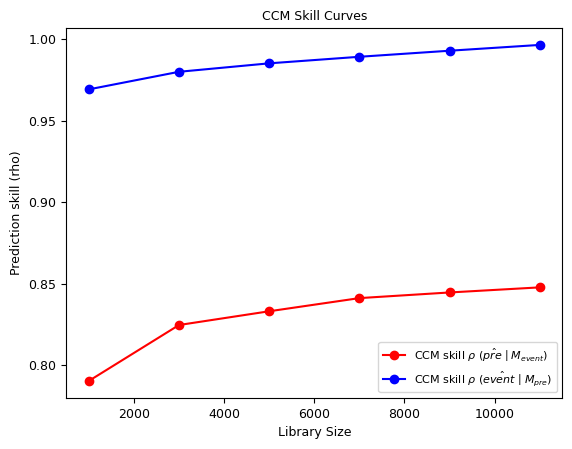

In [9]:
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)

df_event = pd.DataFrame({'age': np.arange(0,len(events_train)), 'event': events_train})
# reset index of df_event
# df_event.reset_index(drop=True, inplace=True)
# 
# print the length of df_event
print(f"Length of df_event: {len(df_event)}")

pre_ccm = df_pre_i['pre'].values[1:]
df_pre_ccm = pd.DataFrame({'age': df_event['age'], 'pre': pre_ccm[::-1]})

ccm_out = cf.ccm_DOXmapForcing (df_event, df_pre_ccm.reset_index(drop=True),
                      E=5, tau=-2,
                      libSizes="1000 3000 5000 7000 9000 11000",
                      Tp=0,
                      sample=10,
                      random=True,
                      showPlot=True)

# sq wave ana

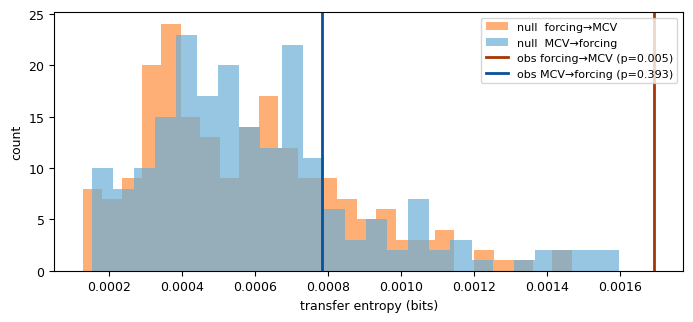

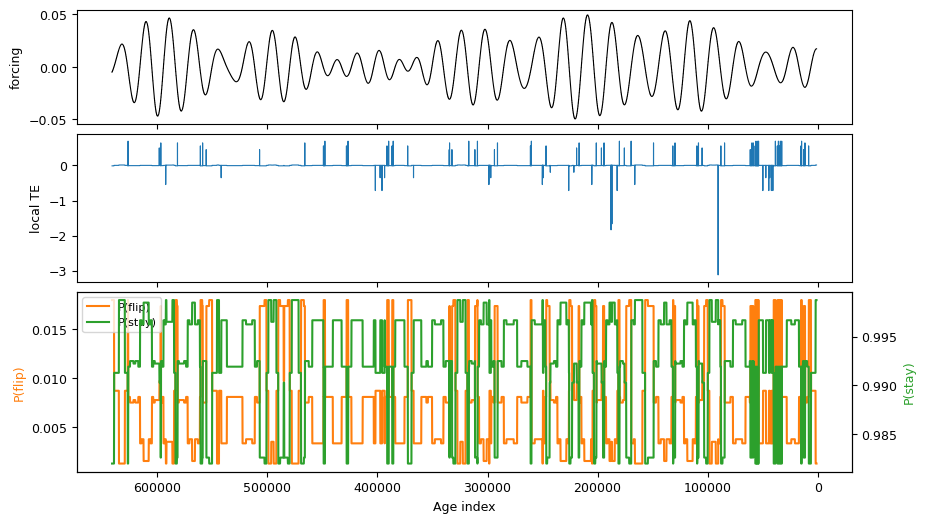

In [11]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


results=sa.thre_data_ana(forcing=pre,sq=sq, 
                         ages=np.flipud(df_sq_i['age'].values),
                            bins_pre       = 6,
                            sigma_mult     = 1.5,
                            n_surr         = 200,)

# TE change with time

# Where the TE comes from

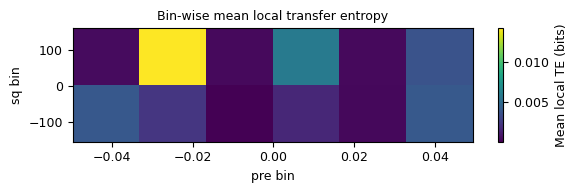

In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

[  2.           2.12812814   2.26446468   2.4095355    2.56390015
   2.72815402   2.90293066   3.08890421   3.28679198   3.49735724
   3.72141217   3.95982098   4.21350322   4.48343737   4.77066461
   5.07629279   5.40150076   5.74754287   6.11575384   6.50755391
   6.92445429   7.368063     7.84009109   8.34235921   8.87680468
   9.4454889   10.05060534  10.694488    11.37962041  12.10864518
  12.88437425  13.70979967  14.58810521  15.52267857  16.5171245
  17.57527869  18.70122254  19.89929892  21.17412896  22.5306298
  23.97403359  25.50990771  27.14417617  28.88314251  30.73351411
  32.70242805  34.79747861  37.02674665  39.39883066  41.92288002
  44.60863025  47.46644056  50.50733383  53.74303909  57.1860368
  60.84960694  64.74788029  68.89589288  73.30964404  78.00615805
  83.00354985  88.3210949   93.97930352 100.        ]
max-power row = 59   →  period ≈ 23.6 ka


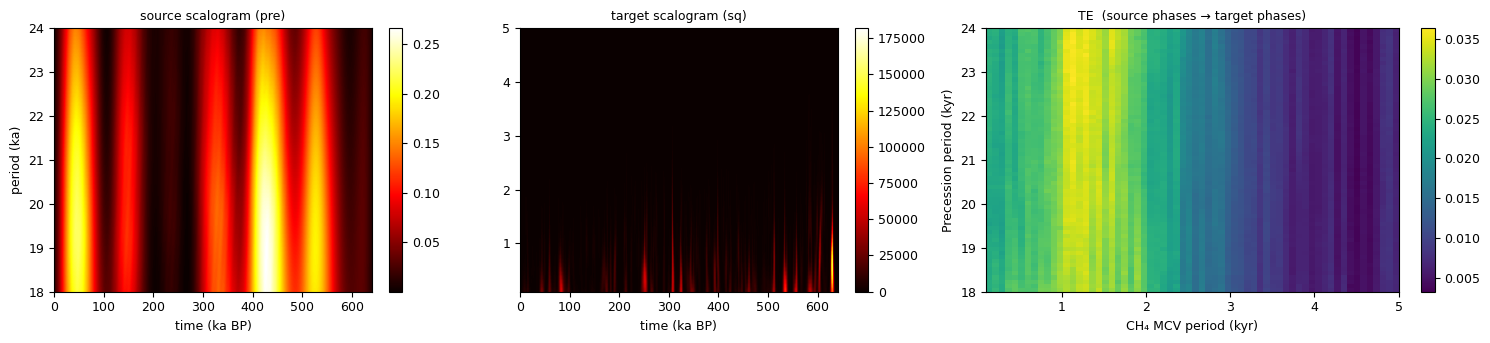

[[0.02405073 0.02456461 0.02210197 ... 0.00759436 0.00808932 0.00642614]
 [0.02385859 0.02426422 0.02178407 ... 0.00766788 0.00804368 0.00617881]
 [0.02325126 0.02385727 0.02143026 ... 0.00765129 0.00835444 0.00631002]
 ...
 [0.02381964 0.02507564 0.02394242 ... 0.00726493 0.0076262  0.00692687]
 [0.0238703  0.02479854 0.02366343 ... 0.00721907 0.00761576 0.00684827]
 [0.02359307 0.0252584  0.02359405 ... 0.007153   0.00755962 0.00675787]]


In [24]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    wavelet='cmor0.5-1.0',
    sampling_period = dt,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 18_000,
    src_max_period = 24_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 2*dt,
    trg_max_period = 5_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='CH₄ MCV'        # e.g. 'sq'
)
print(te_mat)

max-power row = 50   →  period ≈ 22.62 ka


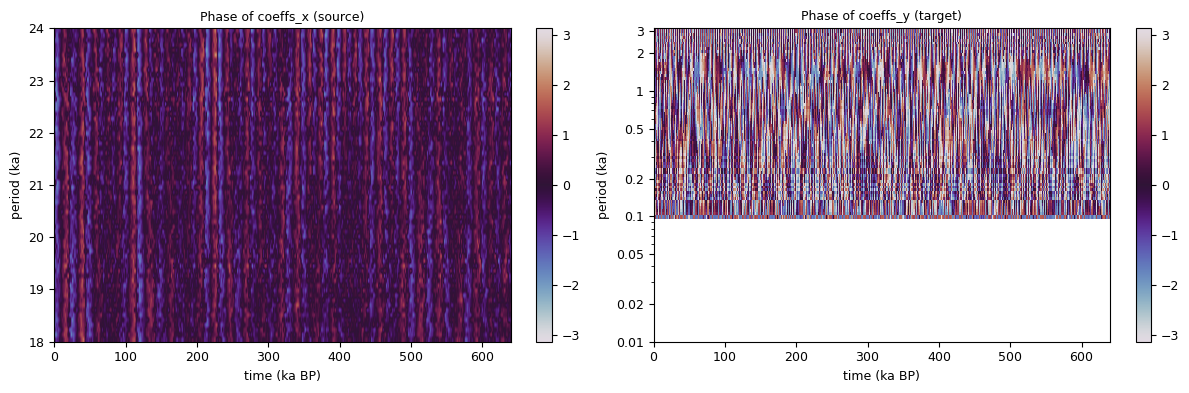

In [ ]:
import numpy as np
import pywt, matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1 · parameters
# ------------------------------------------------------------------
wavelet          = 'cmor1.5-1.0'
sampling_period  = 50            # yr per sample  (→ 0.05 ka)

# source (forcing) band: 18–24 ka
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# target (response) band: 0.01–3 ka
trg_min_period   = 2*sampling_period            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ------------------------------------------------------------------
# 2 · synthetic example data (replace with your pre, sq series)
# ------------------------------------------------------------------
N   = 12_806                       # same as your example
pre = np.random.randn(N)           # forcing  (dummy)
sq  = np.random.randn(N)           # response (dummy)

x = pre[::-1].copy()               # oldest sample first
y = sq[::-1].copy()

# ------------------------------------------------------------------
# 3 · helper to turn periods → scales
# ------------------------------------------------------------------
fc = pywt.central_frequency(wavelet)

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):
        ctr      = min_p
        periods  = ctr * np.geomspace(0.8, 1.2, n_sc)
    else:
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ------------------------------------------------------------------
# 4 · continuous wavelet transforms → phase
# ------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (64, N)
phase_y = np.angle(coeffs_y)       # shape (64, N)

# ------------------------------------------------------------------
# 5 · diagnostic printout (unchanged)
# ------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ------------------------------------------------------------------
# 6 · BUILD PERIOD & TIME EDGES FOR PCOLORMESH
# ------------------------------------------------------------------
# --- period edges (log-spaced) ------------------------------------
edges_p = np.empty(periods_y.size + 1)
edges_p[1:-1] = np.sqrt(periods_y[:-1] * periods_y[1:])    # geometric mean
edges_p[0]    = periods_y[0]**2 / periods_y[1]             # extra low edge
edges_p[-1]   = periods_y[-1]**2 / periods_y[-2]           # extra high edge
edges_p /= 1000.0                                          # yr → ka

# --- time centres and edges (linear) ------------------------------
t_ka   = np.arange(x.size) * sampling_period / 1000.0       # centres, shape (N,)
dt_ka  = sampling_period / 1000.0
edges_t = np.concatenate(([t_ka[0] - dt_ka / 2],
                          t_ka + dt_ka / 2))                # shape (N+1,)

# --- 2-D grids for pcolormesh -------------------------------------
T, P = np.meshgrid(edges_t, edges_p)   # both (65, N+1)

# ------------------------------------------------------------------
# 7 · PLOT: left = source (plain imshow); right = target (log-y pcolormesh)
# ------------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios': [1, 1]})

# ---- left panel: source ------------------------------------------
extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src,
                   vmin=-np.pi, vmax=np.pi)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

# ---- right panel: target (log-y, pcolormesh) ----------------------
im1 = ax[1].pcolormesh(T, P, phase_y,
                       cmap='twilight', shading='flat',
                       vmin=-np.pi, vmax=np.pi)
ax[1].set_yscale('log')
# ax[1].invert_yaxis()                       # short periods at top
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
ax[1].set_ylabel('period (ka)')

# --- NEW: put period ticks explicitly in ka -----------------------
period_ticks = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 3])
ax[1].set_yticks(period_ticks)
ax[1].set_yticklabels([f'{p:g}' for p in period_ticks])

plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


In [ ]:

wavelet          = 'cmor1.5-1.0'
sampling_period  = 50            # yr per sample (→ 0.05 ka on the x-axis)

# --- source (forcing) band: 18–24 ka  -------------------------------
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# --- target (response) band: 0.01–3 ka  ----------------------------
trg_min_period   = 10            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ---------------------------------------------------------------------
# 2. data  – IMPORTANT: the function reverses time, so we do the same
# ---------------------------------------------------------------------
x = pre[::-1].copy()             # forcing, oldest sample first
y = sq[::-1].copy()              # response

# ---------------------------------------------------------------------
# 3. helper to turn periods → scales  (identical to the function code)
# ---------------------------------------------------------------------
import numpy as np, pywt, matplotlib.pyplot as plt

fc = pywt.central_frequency(wavelet)          # wavelet’s centre freq

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):              # “single” band → 3-ish neighbours
        ctr      = min_p
        periods  = ctr * np.geomspace(0.8, 1.2, n_sc)
    else:                                     # log-space band
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period   # ➜ pywt scale formula
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ---------------------------------------------------------------------
# 4. continuous wavelet transforms
# ---------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (n_src_scales, N)
phase_y = np.angle(coeffs_y)       # shape (n_trg_scales, N)

# ---------------------------------------------------------------------
# 5. quick diagnostic: which source period carries the most power?
#    (duplicates the print-statement in the original)
# ---------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ---------------------------------------------------------------------
# 6. plot phase (“angle scalogram”) for x and y
# ---------------------------------------------------------------------
t_ka = np.arange(x.size) * sampling_period / 1000    # time axis in kyr BP

extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
extent_trg = [t_ka[0], t_ka[-1], periods_y[0]/1000, periods_y[-1]/1000]

fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios':[1,1]})

im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

im1 = ax[1].imshow(phase_y, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_trg)
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


max-power row = 59   →  period ≈ 23.57 ka


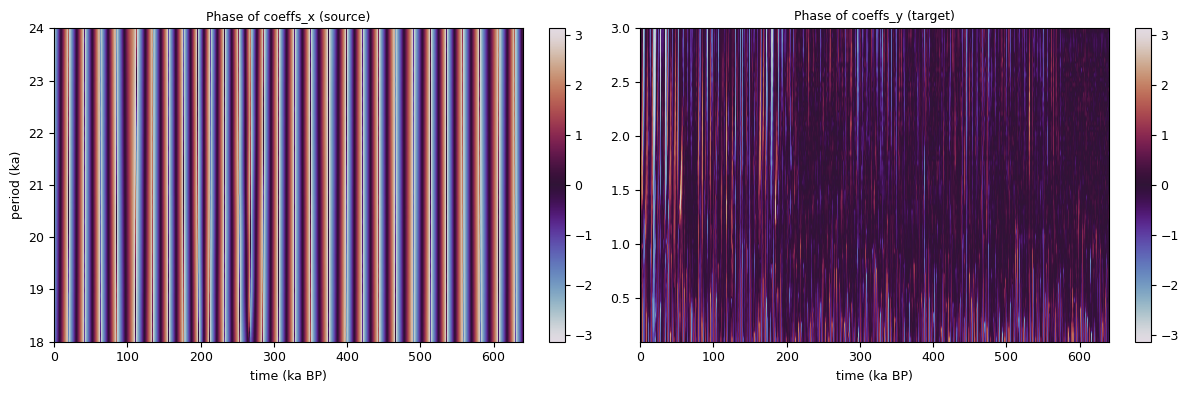

In [10]:

wavelet          = 'cmor0.5-1.0'
sampling_period  = dt            # yr per sample (→ 0.05 ka on the x-axis)

# --- source (forcing) band: 18–24 ka  -------------------------------
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# --- target (response) band: 0.01–3 ka  ----------------------------
trg_min_period   = 2*dt            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ---------------------------------------------------------------------
# 2. data  – IMPORTANT: the function reverses time, so we do the same
# ---------------------------------------------------------------------
x = pre[::-1].copy()             # forcing, oldest sample first
y = sq[::-1].copy()              # response

# ---------------------------------------------------------------------
# 3. helper to turn periods → scales  (identical to the function code)
# ---------------------------------------------------------------------
import numpy as np, pywt, matplotlib.pyplot as plt

fc = pywt.central_frequency(wavelet)          # wavelet’s centre freq

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):              # “single” band → 3-ish neighbours
        ctr      = min_p
        periods  = ctr * np.geomspace(0, 1, n_sc)
    else:                                     # log-space band
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period   # ➜ pywt scale formula
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ---------------------------------------------------------------------
# 4. continuous wavelet transforms
# ---------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (n_src_scales, N)
phase_y = np.angle(coeffs_y)       # shape (n_trg_scales, N)

# ---------------------------------------------------------------------
# 5. quick diagnostic: which source period carries the most power?
#    (duplicates the print-statement in the original)
# ---------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ---------------------------------------------------------------------
# 6. plot phase (“angle scalogram”) for x and y
# ---------------------------------------------------------------------
t_ka = np.arange(x.size) * sampling_period / 1000    # time axis in kyr BP

extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
extent_trg = [t_ka[0], t_ka[-1], periods_y[0]/1000, periods_y[-1]/1000]

fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios':[1,1]})

im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

im1 = ax[1].imshow(phase_y, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_trg)
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


In [42]:
periods_y

array([ 100.        ,  105.54711554,  111.40193599,  117.58153009,
        124.10391342,  130.98810088,  138.25416218,  145.9232803 ,
        154.01781325,  162.56135931,  171.57882573,  181.09650143,
        191.14213361,  201.7450086 ,  212.93603732,  224.74784534,
        237.21486799,  250.3734508 ,  264.26195539,  278.92087139,
        294.39293438,  310.7232506 ,  327.95942831,  346.15171673,
        365.35315239,  385.61971388,  407.01048496,  429.58782681,
        453.41755991,  478.56915584,  505.11593985,  533.13530464,
        562.70893597,  593.9230508 ,  626.86864864,  661.64177686,
        698.34381068,  737.08174872,  777.96852494,  821.12333788,
        866.67199816,  914.74729524,  965.48938461, 1019.04619629,
       1075.5738662 , 1135.23719127, 1198.21010992, 1264.67620912,
       1334.82925964, 1408.87378093, 1487.02563736, 1569.51266757,
       1656.57534864, 1748.46749723, 1845.45700947, 1947.82664202,
       2055.87483636, 2169.91658888, 2290.28436918, 2417.32908

(array([255., 267., 252., 253., 266., 246., 272., 252., 251., 251., 256.,
        252., 253., 243., 243., 249., 231., 236., 217., 272., 196., 255.,
        215., 276., 237., 259., 271., 287., 280., 257., 265., 264., 247.,
        245., 275., 246., 275., 264., 276., 260., 273., 291., 251., 266.,
        253., 275., 262., 255., 260., 253.]),
 array([-3.14132021e+00, -3.01566301e+00, -2.89000581e+00, -2.76434861e+00,
        -2.63869141e+00, -2.51303421e+00, -2.38737701e+00, -2.26171981e+00,
        -2.13606261e+00, -2.01040540e+00, -1.88474820e+00, -1.75909100e+00,
        -1.63343380e+00, -1.50777660e+00, -1.38211940e+00, -1.25646220e+00,
        -1.13080500e+00, -1.00514780e+00, -8.79490596e-01, -7.53833395e-01,
        -6.28176194e-01, -5.02518993e-01, -3.76861792e-01, -2.51204591e-01,
        -1.25547390e-01,  1.09811320e-04,  1.25767012e-01,  2.51424213e-01,
         3.77081414e-01,  5.02738615e-01,  6.28395816e-01,  7.54053017e-01,
         8.79710218e-01,  1.00536742e+00,  1.13102

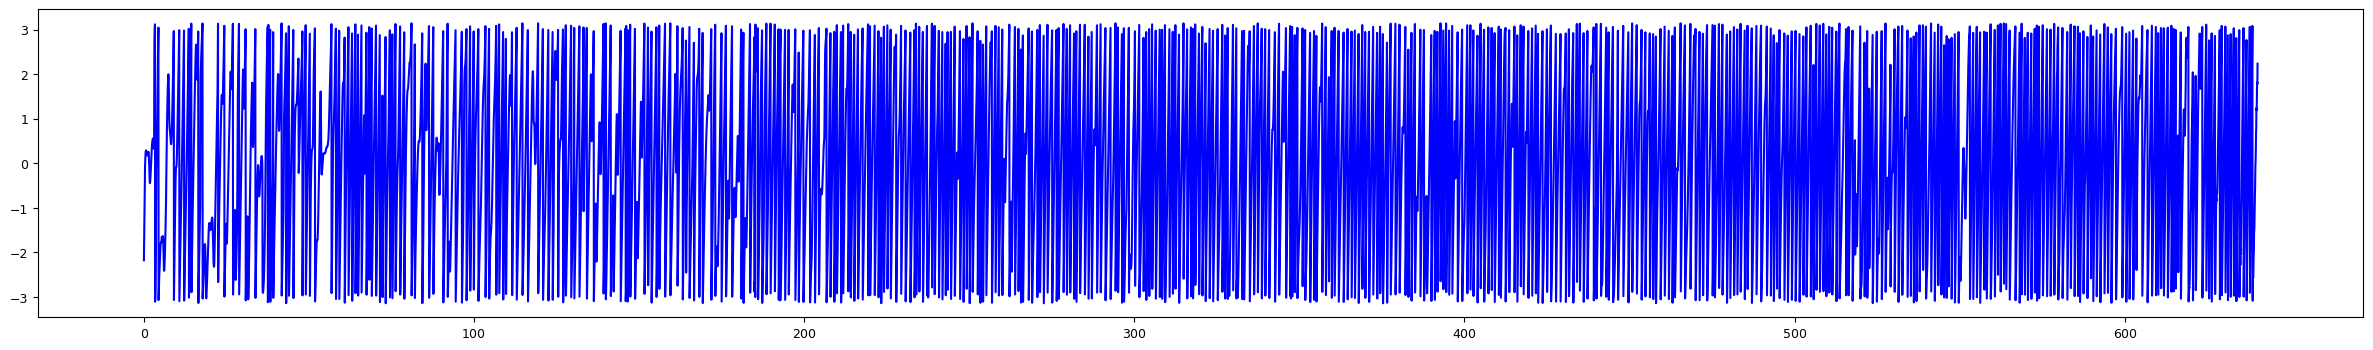

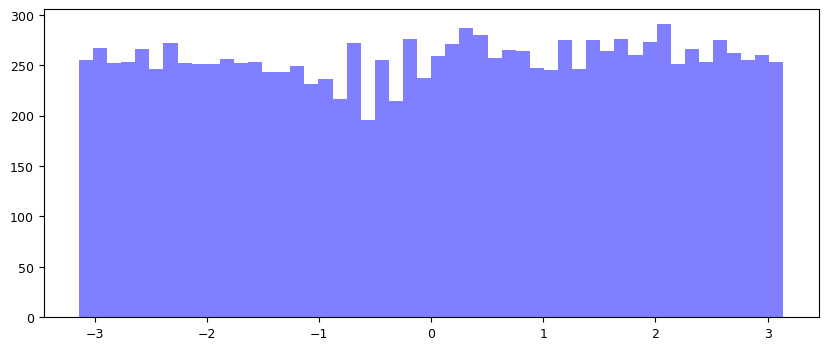

In [45]:

x = np.abs(periods_y - 1000).argmin()
plt.figure(figsize=(30, 4))
plt.plot(t_ka, phase_y[x, :], label='Phase at 0.1 ka', color='blue')

# plot the distribution of phase_y[40,:]
plt.figure(figsize=(10, 4))
plt.hist(phase_y[x, :], bins=50, alpha=0.5, color='blue', label='Distribution at 0.1 ka')

[[-1.28336373 -1.19406432 -1.19742234 ... -1.27940351  2.07824722
   1.98011866]
 [-2.20486315 -2.20622505 -2.20617592 ... -2.20491671  0.933562
   0.93492278]
 [ 2.62933666  2.62928188  2.62928353 ...  2.62933179 -0.51235745
  -0.51233046]
 ...
 [-0.08449517  0.04410879  0.16329723 ...  1.14314808  1.22236106
   1.2635434 ]
 [ 0.47858848  0.59709262  0.71198368 ...  0.83336719  0.93406249
   1.0846353 ]
 [ 1.14477736  1.24109855  1.3367012  ...  0.50851031  0.69057392
   0.7597728 ]]
[1.10708394 0.99625398 0.99516356 1.00016201 1.37058781 1.44890329
 1.18402765 1.02864625 1.51058747 1.67064692 1.13396453 1.99966941
 1.78718119 1.11805322 2.18450793 2.1299639  1.931381   1.44127693
 1.75925097 2.19378793 2.38165332 2.4629485  2.79462924 2.8174859
 2.65707465 2.58817368 2.98027176 2.93656634 2.94750339 2.96676858
 2.97938884 2.96989403 2.98927427 2.99555949 2.99043313 2.99696635
 2.99910133 2.99809574 2.99980721 2.99988757 2.99993625 2.99981085
 2.99975367 2.99990209 2.99985053 2.999923

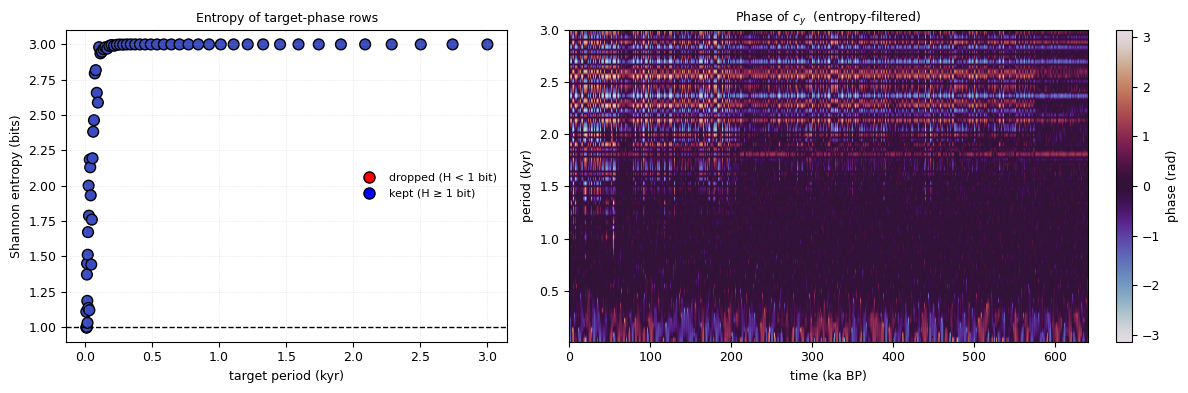

In [64]:
import matplotlib.pyplot as plt
import numpy as np


# bins = linspace(-π, π, 9)#
bins = np.linspace(-np.pi, np.pi, 9)  # 8 bins for phase discretization
phase_y  = np.angle(coeffs_y)         # (n_trg_scales, N)
disc_y   = np.digitize(phase_y, bins) - 1

print(phase_y)

# Shannon entropy per target scale (bits)
from scipy.stats import entropy
H_y = np.array([entropy(np.bincount(row, minlength=8), base=2)
                for row in disc_y])

print(H_y)

# # Threshold: retain rows with at least 1 bit of entropy
good = H_y > 0
# coeffs_y  = coeffs_y[good]
# disc_y    = disc_y[good]
# periods_y = periods_y[good]


fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios': [1, 1.3]})

# x-axis: target period in kyr; use the *pre-mask* periods so the dots
# line up with the mask
ax[0].scatter(periods_y / 1000, H_y, c=good,
              cmap='coolwarm', edgecolor='k', s=60)
ax[0].axhline(1.0, ls='--', lw=1, color='k')
ax[0].set_xlabel('target period (kyr)')
ax[0].set_ylabel('Shannon entropy (bits)')
ax[0].set_title('Entropy of target-phase rows')
# ax[0].invert_xaxis()          # optional: long periods on the left
ax[0].grid(True, ls=':', lw=.5)
ax[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
               label='dropped (H < 1 bit)', markersize=8, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
               label='kept (H ≥ 1 bit)', markersize=8, markeredgecolor='k')
], frameon=False)

# ---------------------------------------------------------------
# 2.  Phase scalogram  (only the “good” rows)
# ---------------------------------------------------------------
# build an extent that maps rows to periods (kyr) and columns to time (ka BP)
t_ka = np.arange(phase_y.shape[1]) * sampling_period / 1000
extent = [t_ka[0], t_ka[-1],           # x-axis: time
          periods_y[good][0] / 1000,   # y-axis: long → short
          periods_y[good][-1] / 1000]

im = ax[1].imshow(phase_y[good], origin='upper', aspect='auto',
                  cmap='twilight', extent=extent)
ax[1].set_title('Phase of $c_{y}$  (entropy-filtered)')
ax[1].set_xlabel('time (ka BP)')
ax[1].set_ylabel('period (kyr)')
plt.colorbar(im, ax=ax[1], fraction=.046, label='phase (rad)')

plt.tight_layout()
plt.show()


In [47]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# te_mat, p_src, p_trg = sa.freq_resolved_te(
#     x = obl,             # forcing   (chronological order!)
#     y = sq,              # response
#     sampling_period = 100,     # yr/pt
#     # source band: narrow around 20 ka
#     src_min_period = 35_000,
#     src_max_period = 50_000,
#     n_src_scales   = 64,
#     # target band: 0.1–3 ka
#     trg_min_period = 10,
#     trg_max_period = 3_000,
#     n_trg_scales   = 64,
#     k = 1,
#     plot = True,
#     source_vname='Obliquity',       # e.g. 'pre'
#     target_vname='CH₄ MCV'        # e.g. 'sq'
# )

# P stay P flip analysis

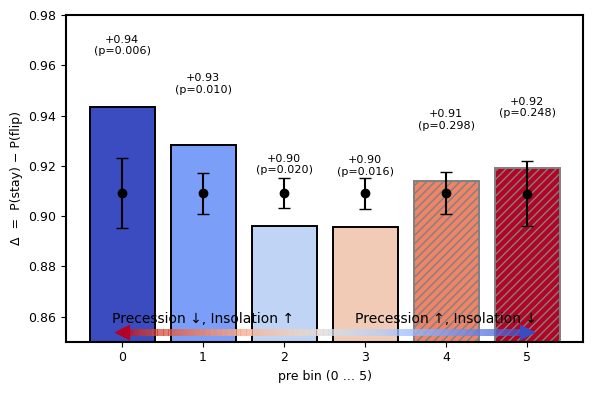

In [11]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_ch4',
        nbins_pre=6,
        n_surr=10000,
        alpha=0.05,
        y_min=0.85,
        y_max=0.98,
        random_state=0   # reproducible
)
# print(delta, mu, sigma, p)

# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_ch4',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

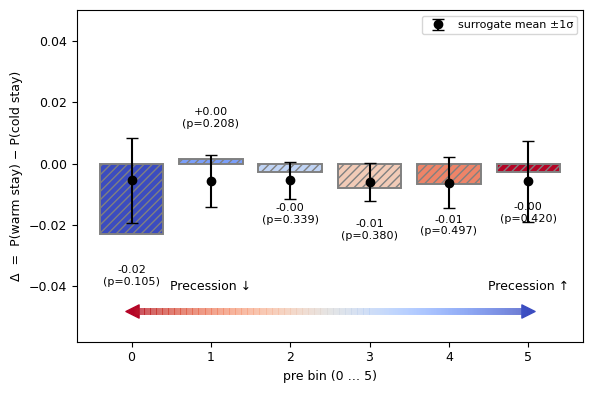

In [101]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_ch4',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
# delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
#     df_pre      = df_obl_i,
#     df_sq       = df_sq_i,
#     forcing_column='obl',
#     target_column='filt_ch4',
#     nbins_pre   = 6,
#     n_surr      = 1000,
#     alpha       = 0.05,
#     random_state=0
# )

# The following are sensitivity tests

# Bin count

(12806,) (12806,) (12806,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    519   1068   1799   1761   1150    509
sq=1    331   1052   1553   1669    966    429


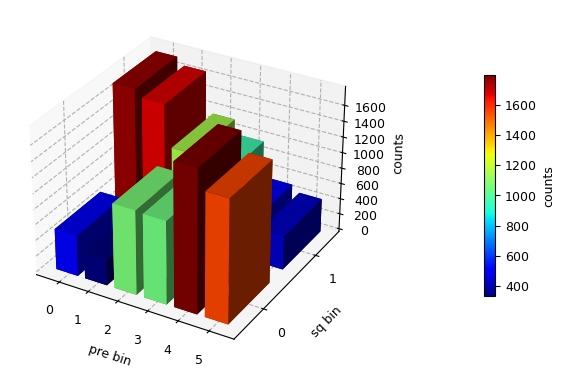

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    666   1400   1085   1019   1576   1060
sq=1    494   1326   1009    991   1218    962


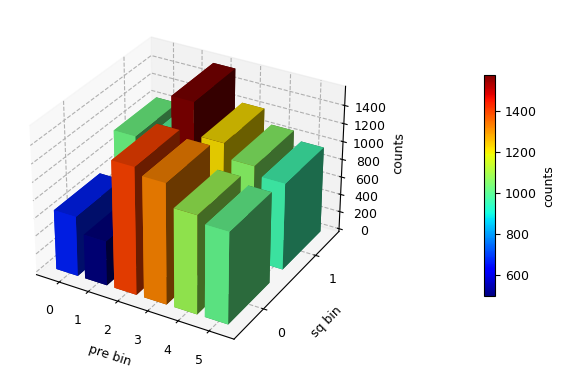

In [102]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

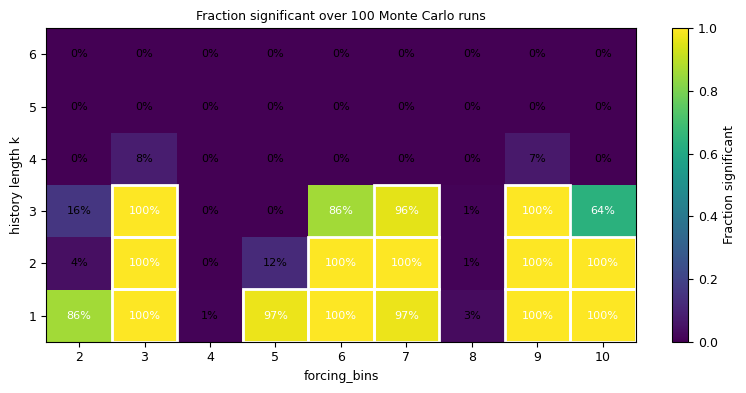

In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 50, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_ch4'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

In [13]:
# Python ≥3.8
import importlib.metadata as im
print(im.version("pyinform"))



0.2.0


In [66]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 10, if_plot=False)

# fractions= sa.mc_TE_heatmap(
#     pre =df_obl_i['obl'].values,
#     sq =df_sq_i['filt_ch4'].values,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     ks=None,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     plot=True)

# Influence of noise, test on different dt

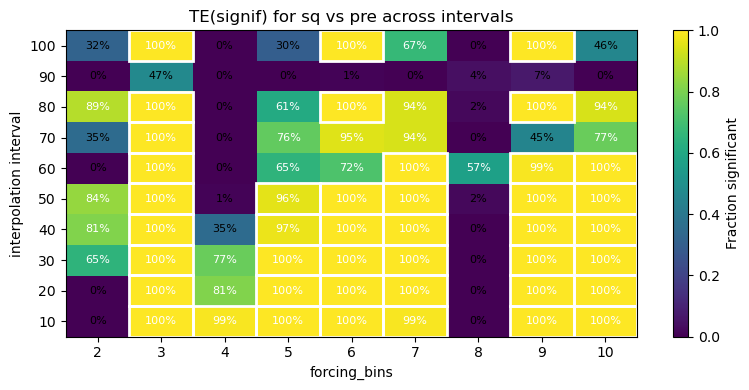

In [ ]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_ch4.copy(),
    target_column='filt_ch4',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

In [65]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )

# f=sa.mc_TE_heatmap_inter(
#     df_filt_ch4,
#     target_column='filt_ch4',
#     intervals=None,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     k=1,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     forcing_var='obl',
#     plot=True
# )

# Influence of age scale uncertainty: random scaling experiment

In [93]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 5800 # the maximum age uncertainty of AICC2023 gas age (Bouchet et al., 2023)
max_age_ratio = max_age_error / np.max(df_filt_ch4['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_ch4.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 30, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_ch4'].values
    
    # test pre → sq
    result_pre, _ = sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ = sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 86 runs
  obl → sq was significant in 64 runs


# Influence of noise: random thining

In [92]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]
[(0.2, False), (0.4, False), (0.6000000000000001, False), (0.8, False), (1.0, False)]


# The influence of different bining plan ([max-min]/2; median; k-means)

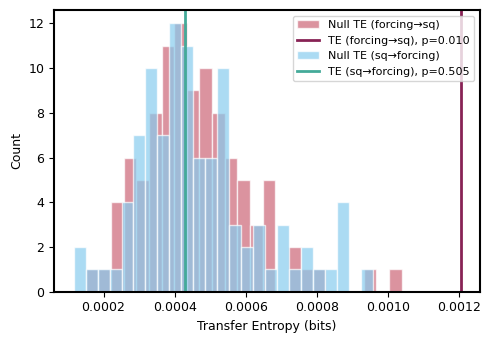

True


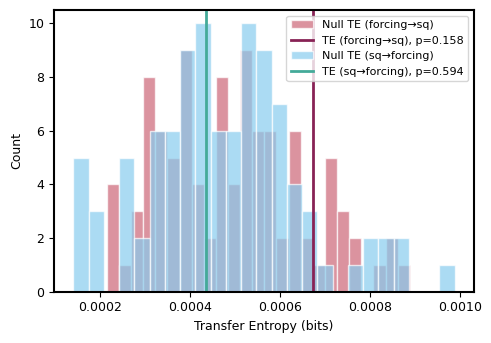

False


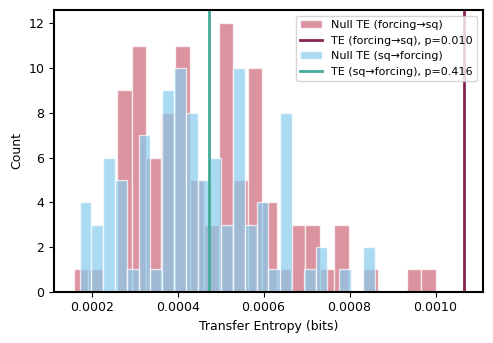

True


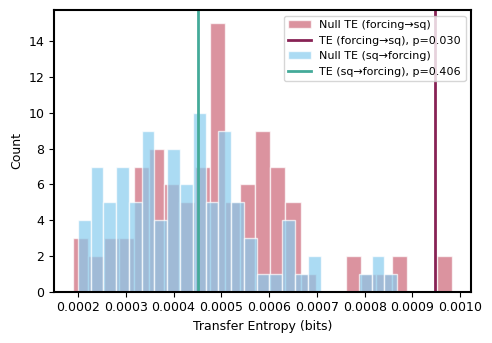

True


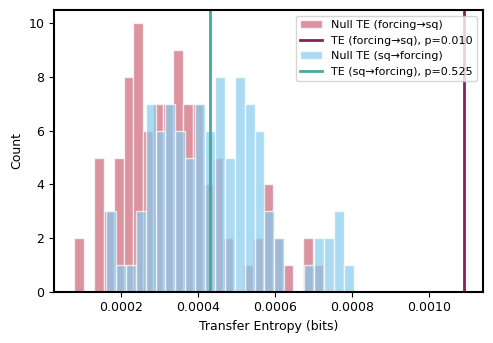

True


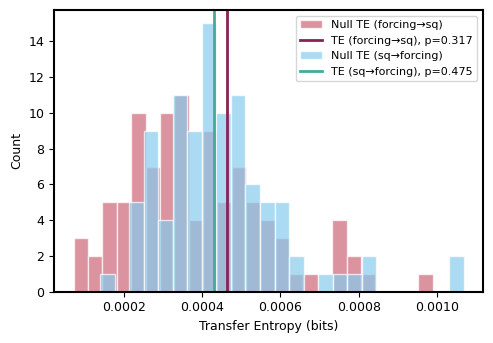

False


In [94]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

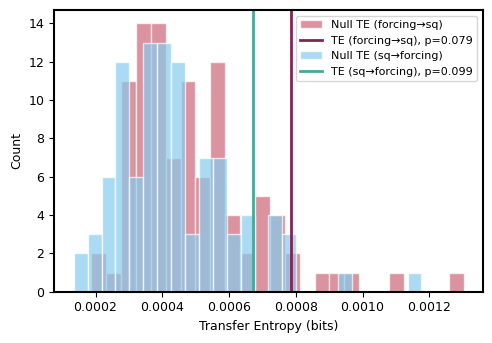

False


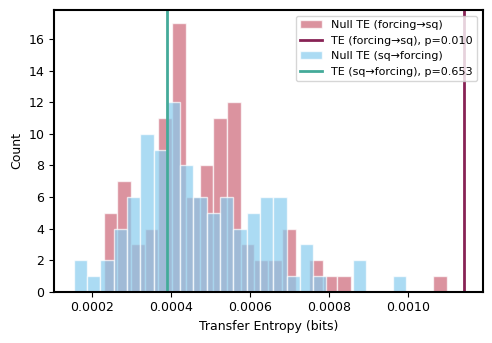

True


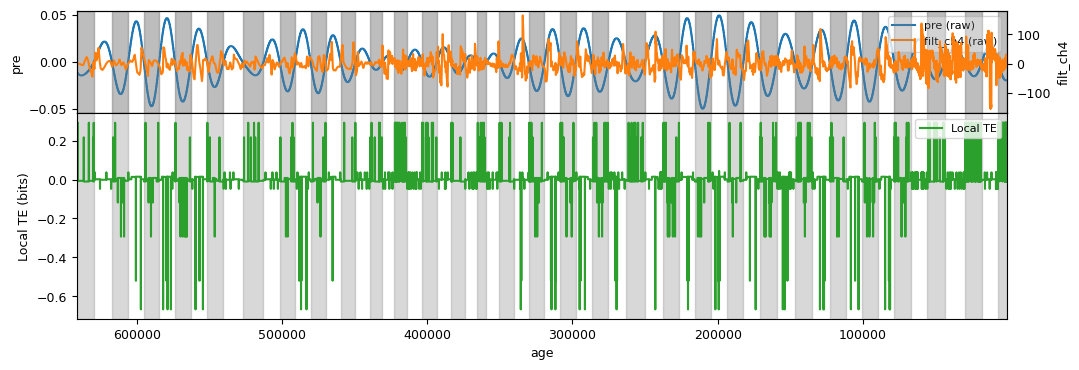

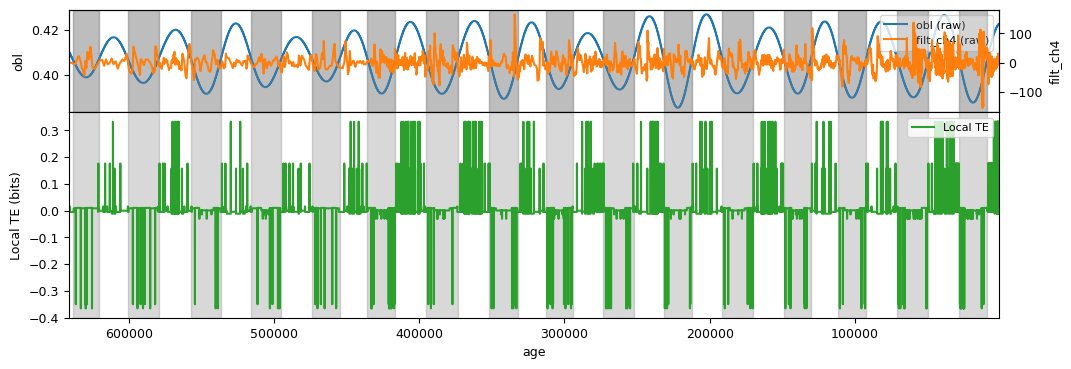

In [95]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

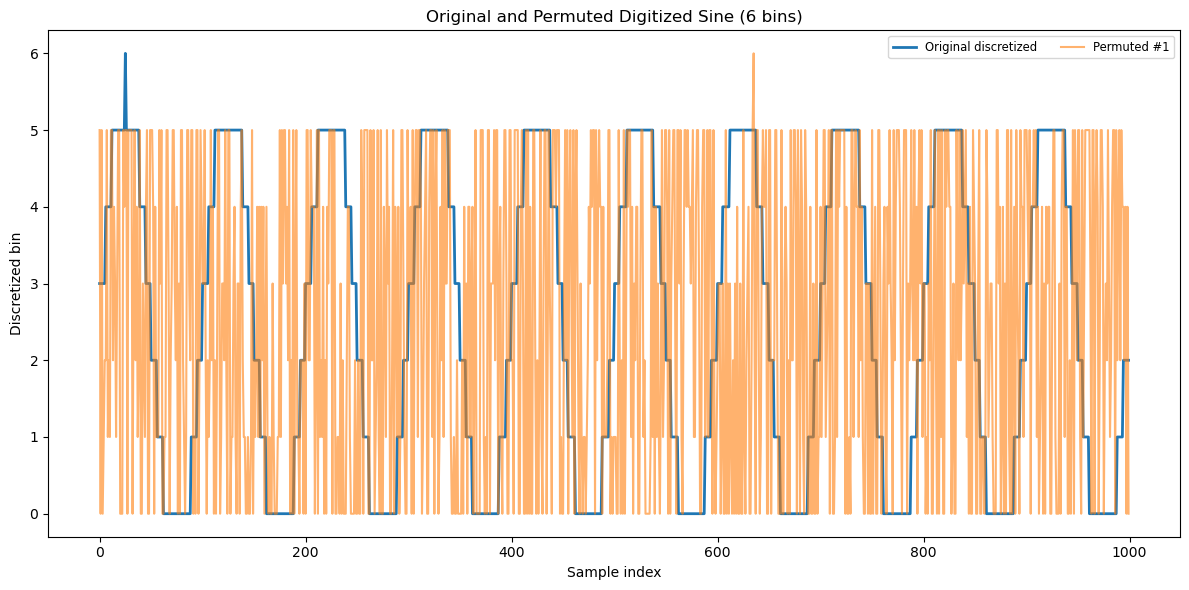

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The CH4 bins

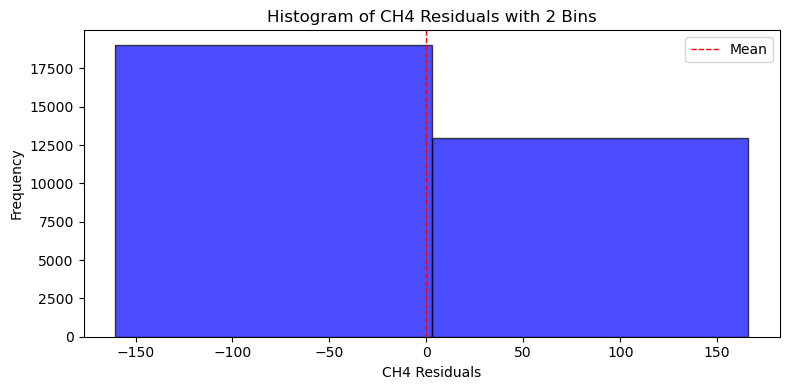

In [ ]:
# plot the histogram of sq with bins=2 
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of CH4 Residuals with 2 Bins')
plt.xlabel('CH4 Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()

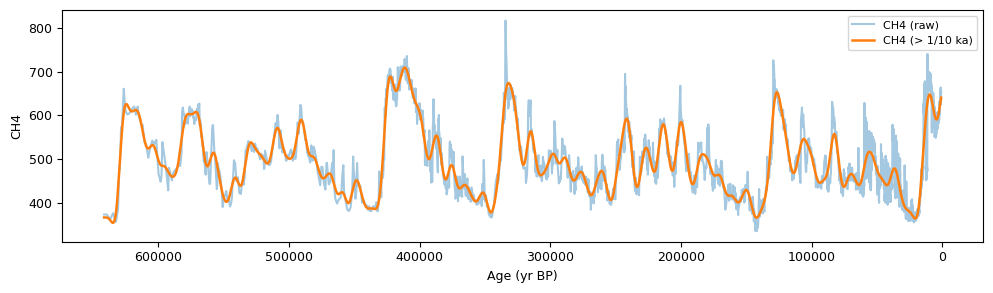

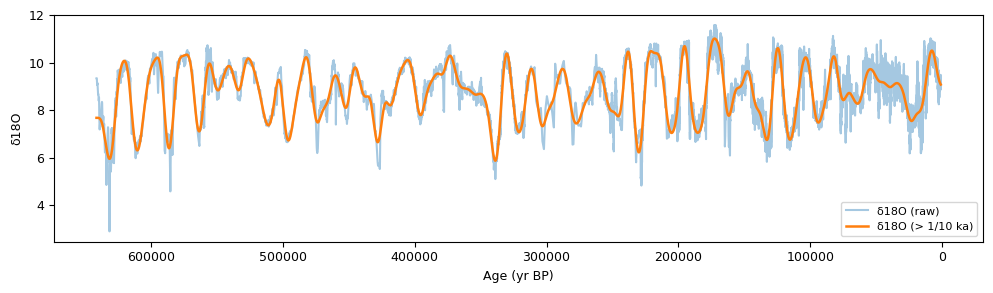

Text(0.5, 0, 'Age (years BP)')

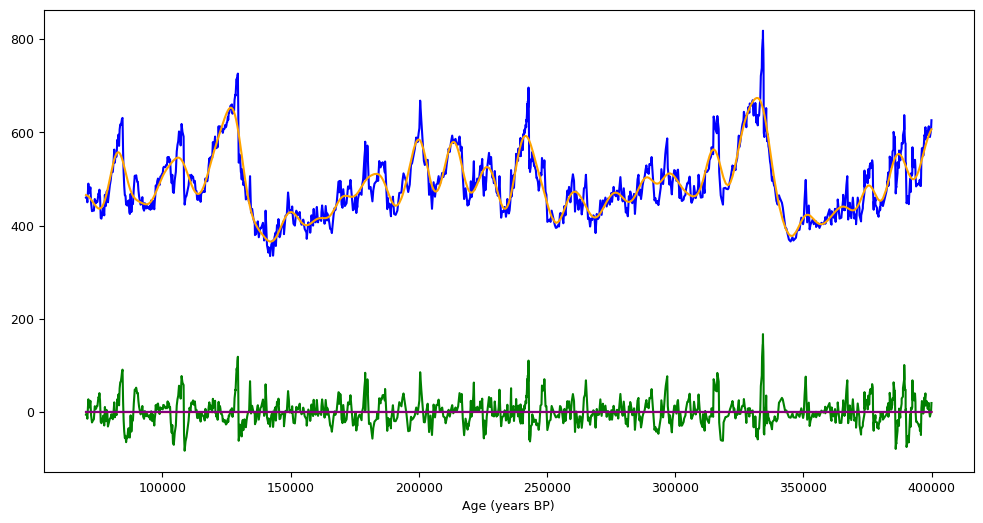

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# 0) Load raw data
df_ch4 = pd.read_excel('other_data/CH4_AICC2023.xlsx', sheet_name='Sheet1')
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)


# save the df_ch4 and df_d18O to csv under Raw_data/
df_ch4.to_csv('D:/VScode/bipolar_seesaw_CCM/Raw_data/CH4_AICC2023.csv', index=False)
df_d18O.to_csv('D:/VScode/bipolar_seesaw_CCM/Raw_data/Speleothem_d18O.csv', index=False)



dt=10
# 1) Build common 10-yr age grid over their overlap
age_min = 1000 # max(df_ch4['age'].min(), df_d18O['age'].min())
age_max = min(df_ch4['age'].max(), df_d18O['age'].max())
ages = np.arange(age_min, age_max + 1, dt)

# 2) Interpolate each onto that grid
ch4 = np.interp(ages, df_ch4['age'], df_ch4['ch4'])
d18O = np.interp(ages, df_d18O['age'], df_d18O['-d18O'])



df_ch4_interp = pd.DataFrame({'age':ages, 'ch4':ch4})
df_d18O_interp = pd.DataFrame({'age':ages, 'd18O':d18O})

df_filt_ch4_low, df_filt_d18O_low = sa.lowpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)


pre_path = r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt"
obl_path = r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_800_inter100.txt"
df_pre_raw = pd.read_csv(pre_path, sep=r'\s+', header=None, engine='python')
df_obl_raw = pd.read_csv(obl_path, sep=r'\s+', header=None, engine='python')

# convert to years & ensure age increasing
df_pre_raw.iloc[:,0] = df_pre_raw.iloc[:,0].abs() * 1000
df_obl_raw.iloc[:,0] = df_obl_raw.iloc[:,0].abs() * 1000
df_pre_raw = df_pre_raw.iloc[::-1].reset_index(drop=True)
df_obl_raw = df_obl_raw.iloc[::-1].reset_index(drop=True)
df_pre_raw.columns = ['age','pre']
df_obl_raw.columns = ['age','obl']

# 2) compute overlapping age bounds
a_min = max(
            df_pre_raw['age'].min(),
            df_obl_raw['age'].min())
a_max = min(
            df_pre_raw['age'].max(),
            df_obl_raw['age'].max())

interval=10
# 3) create unified age vector
new_age = np.arange(a_min, a_max + 1, interval)

# 4) interpolate each series onto new_age
def interp(df, col):
    f = interp1d(df['age'], df[col],
                    kind='nearest',
                    bounds_error=False,
                    fill_value="nan")
    return f(new_age)


df_pre_rs = pd.DataFrame({'age': new_age,
                            'pre': interp(df_pre_raw, 'pre')})
df_obl_rs = pd.DataFrame({'age': new_age,
                            'obl': interp(df_obl_raw, 'obl')})















# 1) make a linear interpolator of the low-pass CH4
f_lp_ch4 = interp1d(
    df_filt_ch4_low['age'],
    df_filt_ch4_low['filt_ch4'],
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate'
)

# 2) sample it at the raw-CH4 ages
df_ch4['ch4_low'] = f_lp_ch4(df_ch4['age'])

# 3) compute the residual (raw minus low-pass)
df_ch4['ch4_residual'] = df_ch4['ch4'] - df_ch4['ch4_low']

# 4) sample precession & obliquity at the same ages
f_pre = interp1d(
    df_pre_rs['age'],
    df_pre_rs['pre'],
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate'
)
f_obl = interp1d(
    df_obl_rs['age'],
    df_obl_rs['obl'],
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate'
)

df_ch4['pre'] = f_pre(df_ch4['age'])
df_ch4['obl'] = f_obl(df_ch4['age'])

# crop the data between 10000 to 640000
df_ch4 = df_ch4[(df_ch4['age'] >= 70000) & (df_ch4['age'] <= 400000)]

# plot all columns of df_ch4
plt.figure(figsize=(12, 6))
plt.plot(df_ch4['age'], df_ch4['ch4'], label='Raw CH4', color='blue')
plt.plot(df_ch4['age'], df_ch4['ch4_low'], label='Low-pass CH4', color='orange')
plt.plot(df_ch4['age'], df_ch4['ch4_residual'], label='CH4 Residual', color='green')
plt.plot(df_ch4['age'], df_ch4['pre'], label='Precession', color='red')
plt.plot(df_ch4['age'], df_ch4['obl'], label='Obliquity', color='purple')
plt.xlabel('Age (years BP)')

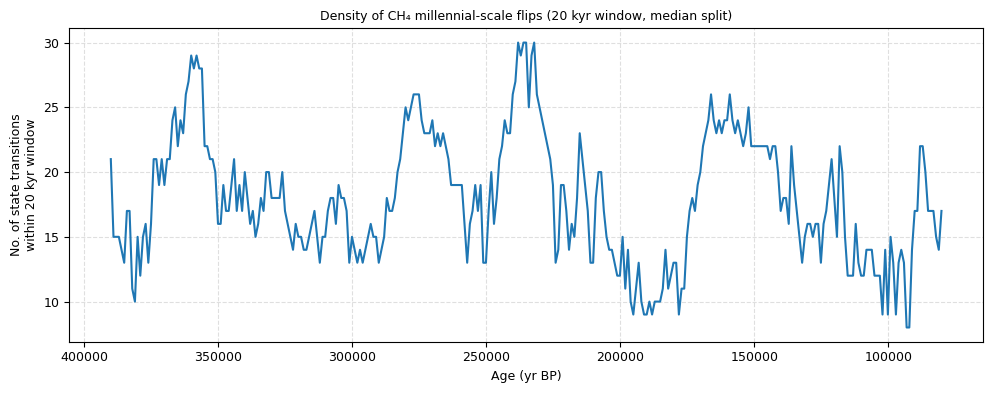

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# parameters (feel free to tweak)
# ----------------------------------------------------------
WINDOW = 20_000        # kyr window width (years)
STEP   = 1_000         # kyr step between windows (years)

age   = df_ch4['age'].values          # yrs BP
resid = df_ch4['ch4_residual'].values

# ----------------------------------------------------------
# 1. ensure ascending time order
# ----------------------------------------------------------
if np.any(np.diff(age) < 0):                # ages decreasing?
    age, resid = age[::-1], resid[::-1]     # reverse both

# ----------------------------------------------------------
# 2. set up sliding-window centres
# ----------------------------------------------------------
half_w = WINDOW / 2
t_min, t_max = age.min(), age.max()
centres = np.arange(t_min + half_w, t_max - half_w + STEP, STEP)

# ----------------------------------------------------------
# 3. count transitions in each window
# ----------------------------------------------------------
n_transitions = []

for c in centres:
    lo, hi = c - half_w, c + half_w
    mask   = (age >= lo) & (age < hi)
    seg_t  = age[mask]
    seg_r  = resid[mask]
    
    # need ≥2 points to count a transition
    if seg_r.size < 2:
        n_transitions.append(np.nan)
        continue
    
    med      = np.nanmedian(seg_r)
    states   = (seg_r >= med).astype(int)        # 0 = low, 1 = high
    flips    = np.diff(states) != 0              # True where state changes
    n_transitions.append(flips.sum())

n_transitions = np.array(n_transitions)

# ----------------------------------------------------------
# 4. plot
# ----------------------------------------------------------
plt.figure(figsize=(10,4))
plt.plot(centres, n_transitions, lw=1.5)
plt.gca().invert_xaxis()              # yrs BP → younger on left
plt.xlabel('Age (yr BP)')
plt.ylabel('No. of state transitions\nwithin 20 kyr window')
plt.title('Density of CH₄ millennial-scale flips (20 kyr window, median split)')
plt.grid(True, alpha=.4)
plt.tight_layout()
plt.show()


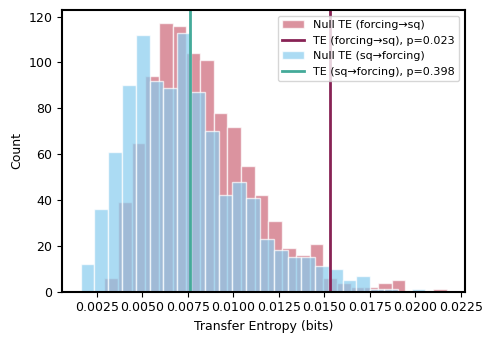

True


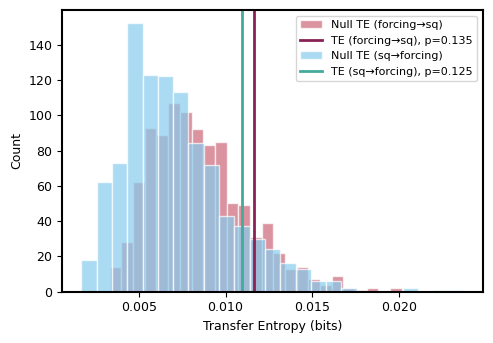

False


In [6]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 500, if_plot=False)
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_sq_i.copy(), 50, if_plot=False)

# crop the df_filt_ch4 between 120000 and 640000
# df_filt_ch4 = df_filt_ch4[(df_filt_ch4['age'] >= 120000) & (df_filt_ch4['age'] <= 640000)].reset_index(drop=True)

# dt = 100
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), dt, if_plot=False)


pre = df_ch4['pre'].values      # source (precession)
obl = df_ch4['obl'].values    # target (obliquity)
sq = df_ch4['ch4_residual'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=5, sq_bins=2, n_surr=1000, k=1,sq_method='quantile')

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig, te_obl=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=5, sq_bins=2, n_surr=1000, k=1,sq_method='quantile')
print(result)


# LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)




# # LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
# #                    forcing_column='obl',
# #                    target_column='filt_ch4',
# #                    time_column='age',
# #                    nbins_pre=4,
# #                    nbins_target=2)



# Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)




# # Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
# #                    forcing_column='obl',
# #                    target_column='filt_ch4',
# #                    time_column='age',
# #                    nbins_pre=6,
# #                    smooth_win=300)


# Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)